# Solution to the preparatory lab 
In this notebook, we use the following modules `numpy` and `maze`. The latter is a home made module, where all the solutions to the questions are implemented. We will refer to it at each answer, and we encourage you to read it.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import bank as bk
import bankSolver as bs
%load_ext autoreload
%autoreload 2

# Problem 3: Bank robbing

The objective of problem 3 is to maximize the amount of money collected without being caught by the police.

In [2]:
# Description of the town as a numpy array
# 1 is the robber starting position
# 2 is the police starting position
# 3 is the bank position
town = np.array([
    [1, 0, 0, 0],
    [0, 3, 0 ,0],
    [0, 0, 0, 0],
    [0, 0, 0, 2]
])
# Bank instance
bank   = bk.Bank(town)

In [ ]:
# Q-learning
Q, P = bs.Q_learning(bank, lmbda=0.8, T=10000000)

In [55]:
# SARSA
Q, P, Q_graph = bs.sarsa(bank, lmbda=0.8, eps=0.1, T=10000000)

100%|████████████████████████████████████████████████████████████████| 10000000/10000000 [06:25<00:00, 25909.01it/s]


In [54]:
# Save the policy if needed
np.save('sarsa_policy_lmbda8_eps1', P)

In [ ]:
P = np.load('policy.npy')

In [60]:
# Possible to pass player and police coordinates
path, path_enemy = bank.simulate(P, tlimit=10)

In [61]:
path, path_enemy

([(0, 0),
  (0, 0),
  (1, 0),
  (1, 1),
  (1, 1),
  (1, 1),
  (0, 1),
  (1, 1),
  (2, 1),
  (1, 1)],
 [(3, 3),
  (2, 3),
  (2, 2),
  (2, 3),
  (1, 3),
  (1, 2),
  (2, 2),
  (2, 1),
  (1, 1),
  (1, 2)])

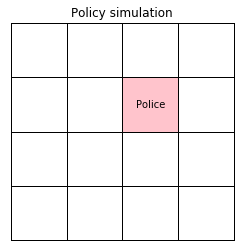

In [62]:
bk.animate_solution(town, path, path_enemy)

In [63]:
player_pos = (1,1)
joints     = [bank.jointStates2id[(player_pos, p)] for p in bank.coords]

In [64]:
for s in joints:
    print('state : ', bank.id2jointStates[s])
    print('policy: ', bank.actions_names[P[s]])

state :  ((1, 1), (0, 0))
policy:  stay
state :  ((1, 1), (0, 1))
policy:  move up
state :  ((1, 1), (0, 2))
policy:  stay
state :  ((1, 1), (0, 3))
policy:  stay
state :  ((1, 1), (1, 0))
policy:  move down
state :  ((1, 1), (1, 1))
policy:  stay
state :  ((1, 1), (1, 2))
policy:  move up
state :  ((1, 1), (1, 3))
policy:  stay
state :  ((1, 1), (2, 0))
policy:  stay
state :  ((1, 1), (2, 1))
policy:  move down
state :  ((1, 1), (2, 2))
policy:  stay
state :  ((1, 1), (2, 3))
policy:  stay
state :  ((1, 1), (3, 0))
policy:  stay
state :  ((1, 1), (3, 1))
policy:  stay
state :  ((1, 1), (3, 2))
policy:  stay
state :  ((1, 1), (3, 3))
policy:  stay


### Convergence

In [37]:
Q_graph_0 = [x[0] for x in Q_graph]
Q_graph_1 = [x[1] for x in Q_graph]
Q_graph_2 = [x[2] for x in Q_graph]
Q_graph_3 = [x[3] for x in Q_graph]
Q_graph_4 = [x[4] for x in Q_graph]

In [38]:
bank.jointStates2id[((1,1), (1,2))]

86

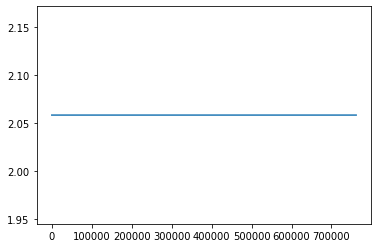

In [46]:
tps = range(len(Q_graph_0))
plt.plot(tps, Q_graph_0)